# EDA of Final Take Home Users Dataset

---------

- Here we'll do EDA on the final dataset that we have created from previous analysis.
- We'll go through the dataset to find user's behavior w.r.t. different attributes.

Objectives:
> 1. Find correlations in the dataset.
> 2. Check for attributes that affects user's activity.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime as dt

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120
sns.set_style('darkgrid')

### Read the dataset

In [4]:
df = pd.read_csv("takehome_users_cleaned_dataset.csv")
df.head()

,Unnamed: 0,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,time,user_type
0,0,1,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4,3.53,0
1,1,2,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11,3.45,0
2,2,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3,23.14,0
3,3,4,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5,8.09,0
4,4,5,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1,10.14,0


### Drop unwanted columns

In [3]:
df.drop(columns=['Unnamed: 0', 'time'], inplace=True)

In [7]:
# Shape of the data
df.shape

(12000, 11)

### Information about dataset

In [8]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'user_type'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  user_type                   12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [10]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.014115e+09,0.249500,0.149333,141.884583,3188.691333,0.119333
std,3464.24595,6.087938e+08,0.432742,0.356432,124.056723,3869.027693,0.324194
min,1.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000e+00,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,1.368880e+09,0.000000,0.000000,108.000000,875.000000,0.000000
75%,9000.25000,1.393729e+09,0.000000,0.000000,238.250000,6317.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


### Check Correlation in the dataset

In [11]:
df.corr()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type
object_id,1.000000,0.009651,-0.032370,-0.022040,0.004110,0.001657,0.004462
last_session_creation_time,0.009651,1.000000,0.010916,0.012604,0.010231,0.021160,0.231729
opted_in_to_mailing_list,-0.032370,0.010916,1.000000,0.483529,0.003432,0.007536,0.003990
enabled_for_marketing_drip,-0.022040,0.012604,0.483529,1.000000,0.009275,0.003431,0.000833
org_id,0.004110,0.010231,0.003432,0.009275,1.000000,-0.040868,0.060361
invited_by_user_id,0.001657,0.021160,0.007536,0.003431,-0.040868,1.000000,0.023881
user_type,0.004462,0.231729,0.003990,0.000833,0.060361,0.023881,1.000000


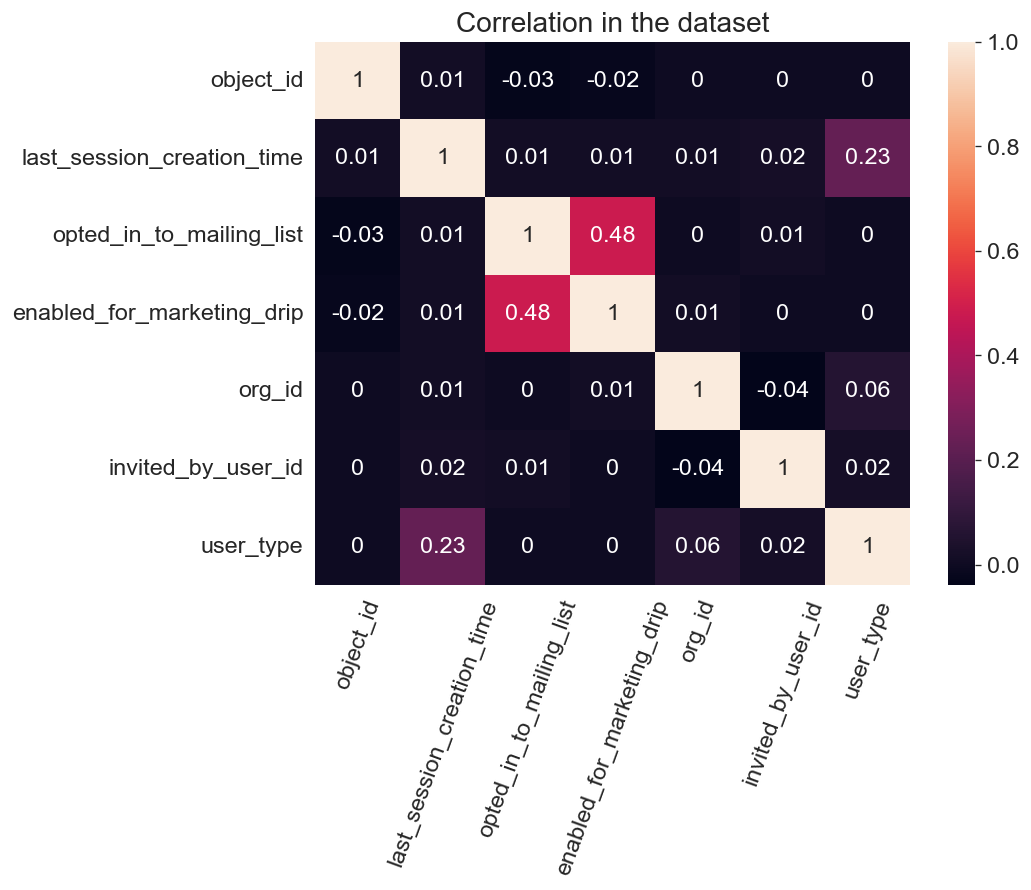

In [12]:
# Correlaton matrix plot
sns.heatmap(df.corr().round(2), annot=True)
plt.xticks(rotation=70)
plt.title("Correlation in the dataset")
plt.show()

In [13]:
# convert creation_time to date time format
df.creation_time = pd.to_datetime(df.creation_time)

df['year'] = df.creation_time.dt.year

### Analysis

In [14]:
df.user_type.value_counts()

0    10568
1     1432
Name: user_type, dtype: int64

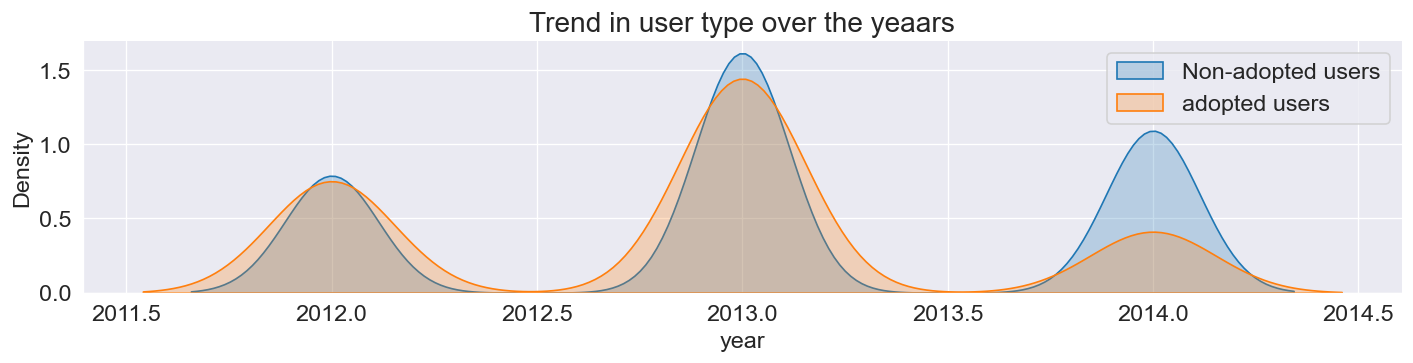

In [15]:
sns.FacetGrid(df, hue='user_type', aspect=4).map(sns.kdeplot, 'year', shade=True)
plt.legend(labels=['Non-adopted users', 'adopted users'])
plt.title("Trend in user type over the yeaars")
plt.show()

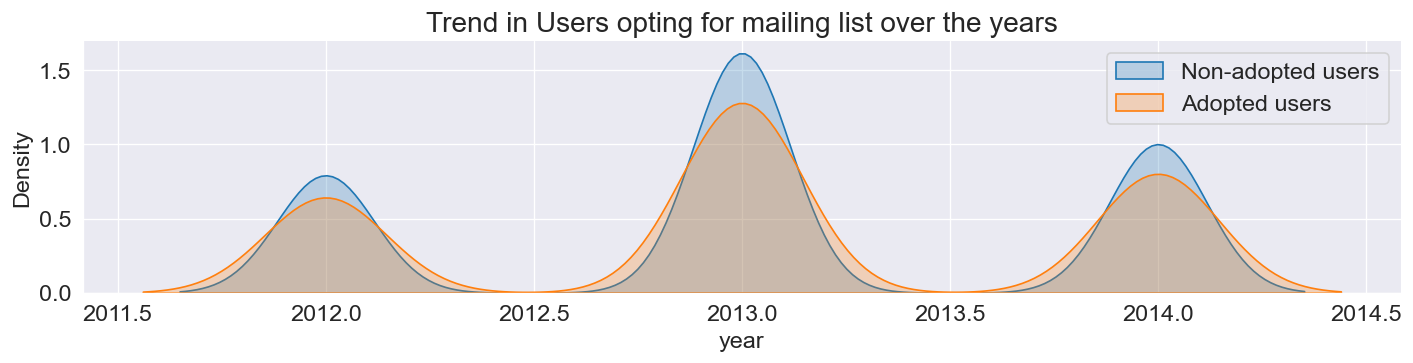

In [16]:
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='opted_in_to_mailing_list', aspect=4).map(sns.kdeplot, 'year', shade=True)
plt.legend(labels=['Non-adopted users', "Adopted users"])
plt.title("Trend in Users opting for mailing list over the years")
plt.show()

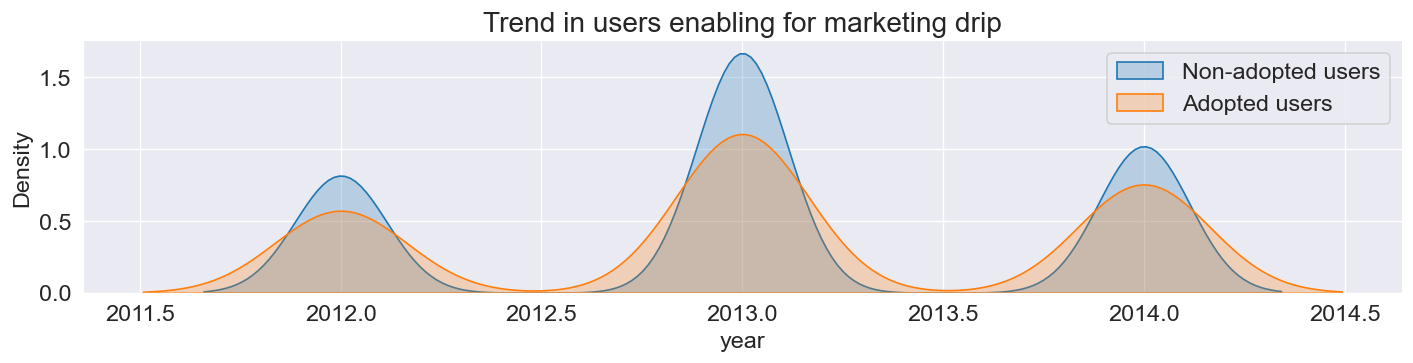

In [17]:
sns.FacetGrid(df, hue='enabled_for_marketing_drip', aspect=4).map(sns.kdeplot, 'year', shade=True)
plt.legend(labels=['Non-adopted users', "Adopted users"])
plt.title("Trend in users enabling for marketing drip")
plt.show()

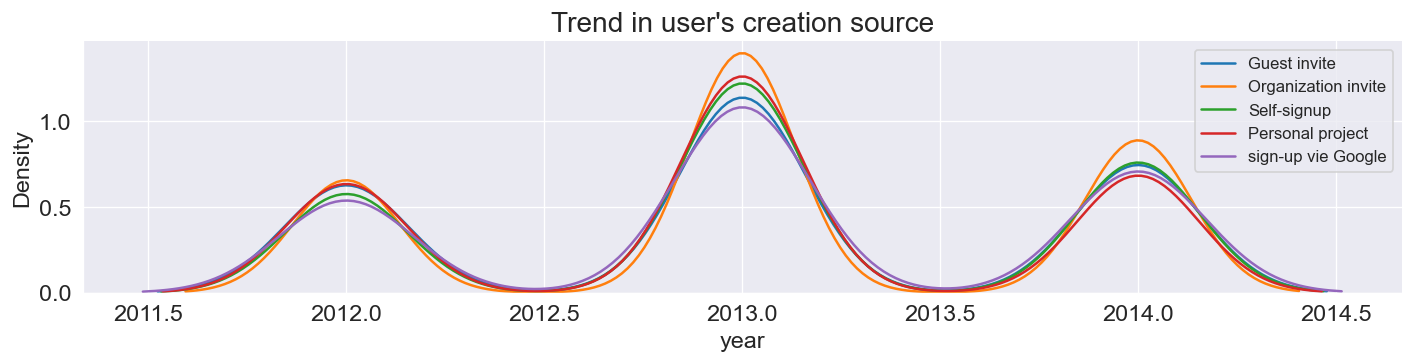

In [18]:
# Trend in User IDs Creation Source
sns.FacetGrid(df, hue='creation_source', aspect=4).map(sns.kdeplot, 'year', shade=False)
plt.legend(labels=['Guest invite', 'Organization invite', 'Self-signup', 'Personal project', 'sign-up vie Google'], fontsize=10)
plt.title('Trend in user\'s creation source')
plt.show()

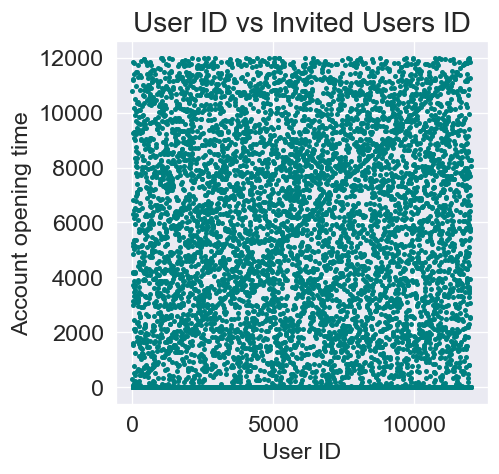

In [19]:
fig = plt.figure(figsize=(4,4))
plt.plot(df.object_id, df.invited_by_user_id, 'o', markersize=2, color='teal')
plt.xlabel("User ID")
plt.ylabel("Account opening time")
plt.title("User ID vs Invited Users ID")
plt.show()

In [20]:
# types of user
df.user_type.value_counts()

0    10568
1     1432
Name: user_type, dtype: int64

In [21]:
# change the user type values to names
# 0: non adopted users
# 1: adopted users
df.user_type = df.user_type.replace([0,1],['non-adopted user', 'adopted user'])

In [22]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type,year
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,non-adopted user,2014
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,non-adopted user,2013
2,3,2013-03-19 23:14:52,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,non-adopted user,2013
3,4,2013-05-21 08:09:28,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,non-adopted user,2013
4,5,2013-01-17 10:14:20,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,non-adopted user,2013


### Classify the users based on Creation Source

In [23]:
# Create a DataFrame by grouping their creation source
df1 = df.groupby(['creation_source', 'user_type']).user_type.count().reset_index(name='total')
df1

,creation_source,user_type,total
0,GUEST_INVITE,adopted user,330
1,GUEST_INVITE,non-adopted user,1833
2,ORG_INVITE,adopted user,490
3,ORG_INVITE,non-adopted user,3764
4,PERSONAL_PROJECTS,adopted user,141
5,PERSONAL_PROJECTS,non-adopted user,1970
6,SIGNUP,adopted user,263
7,SIGNUP,non-adopted user,1824
8,SIGNUP_GOOGLE_AUTH,adopted user,208
9,SIGNUP_GOOGLE_AUTH,non-adopted user,1177


In [24]:
# Find percentage of creation source type
df1['percentage'] = round((df1.total/df.object_id.nunique()) * 100, 2)

df1

,creation_source,user_type,total,percentage
0,GUEST_INVITE,adopted user,330,2.75
1,GUEST_INVITE,non-adopted user,1833,15.28
2,ORG_INVITE,adopted user,490,4.08
3,ORG_INVITE,non-adopted user,3764,31.37
4,PERSONAL_PROJECTS,adopted user,141,1.18
5,PERSONAL_PROJECTS,non-adopted user,1970,16.42
6,SIGNUP,adopted user,263,2.19
7,SIGNUP,non-adopted user,1824,15.20
8,SIGNUP_GOOGLE_AUTH,adopted user,208,1.73
9,SIGNUP_GOOGLE_AUTH,non-adopted user,1177,9.81


In [25]:
# Plot creation source classification
fig = px.bar(
    df1,
    x='creation_source',
    y='total',
    color='user_type',
    barmode='group',
    title="Classification of Users based on invitation type",
    text=df1.percentage.apply(lambda x: '{}%'.format(x))
)

fig.update_layout(
    height=500,
    width=900,
    title= dict(
        font=dict(
            family='Time New Roman',
            size=24
        )
    )
)
fig.show()

### Classify the users based on promotional mail activation

In [26]:
# Find the total users and their percentage that have whether opted for mailing list or not
# Also find the metrics for users on regular marketing drip
df2 = df.groupby(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'user_type']).user_type.count().to_frame()
df2.rename(columns={'user_type':'total'}, inplace=True)
df2['percent'] = round((df2.total/df.shape[0]) * 100,2)
df2.replace([0,1], ['No','Yes'],inplace=True)
df2.rename(index={0:'No', 1:'Yes'}, inplace=True)
df2.rename(index={'adopted user':'adopted', 'non-adopted user':'non-adopted'}, inplace=True)
df2

total  \
opted_in_to_mailing_list enabled_for_marketing_drip user_type            
No                       No                         adopted       1015   
                                                    non-adopted   7541   
                         Yes                        adopted         53   
                                                    non-adopted    397   
Yes                      No                         adopted        202   
                                                    non-adopted   1450   
                         Yes                        adopted        162   
                                                    non-adopted   1180   

                                                                 percent  
opted_in_to_mailing_list enabled_for_marketing_drip user_type             
No                       No                         adopted         8.46  
                                                    non-adopted    62.84  
                         Yes                        adopted         0.44  
                                                    non-adopted     3.31  
Yes                      No                         adopted         1.68  
                                                    non-adopted    12.08  
                         Yes                        adopted         1.35  
                                                    non-adopted     9.83

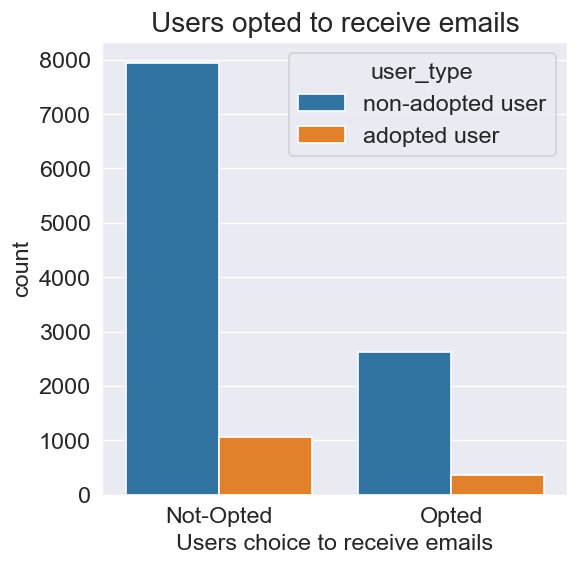

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='opted_in_to_mailing_list', hue='user_type', data=df)
plt.title("Users opted to receive emails")
plt.xticks([0,1],['Not-Opted', 'Opted'])
plt.xlabel("Users choice to receive emails")
plt.show()


In [6]:
# New users behavior to opt for mailing list
mail_list = df.groupby(['year','opted_in_to_mailing_list',]).year.count().reset_index(name='total')
mail_list

,year,opted_in_to_mailing_list,total
0,2012,0,2091
1,2012,1,706
2,2013,0,4269
3,2013,1,1407
4,2014,0,2646
5,2014,1,881


In [7]:
fig = px.line(
    mail_list,
    x = 'year',
    y = 'total',
    color='opted_in_to_mailing_list',
    title='User Behavior to Opt for Mailing List'
)


fig.show()

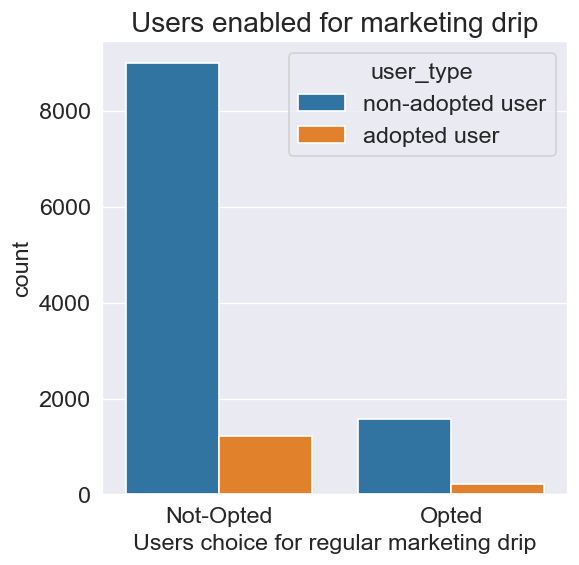

In [28]:
# Countplot of users based on regular marketing drip
fig = plt.figure(figsize=(5,5))
sns.countplot(x='enabled_for_marketing_drip', hue='user_type', data=df)
plt.title("Users enabled for marketing drip")
plt.xticks([0,1],['Not-Opted', 'Opted'])
plt.xlabel("Users choice for regular marketing drip")
plt.show()

In [8]:
# Users behavior to opt for marketing drip
marketing_drip = df.groupby(['year','enabled_for_marketing_drip',]).year.count().reset_index(name='total')
marketing_drip

,year,enabled_for_marketing_drip,total
0,2012,0,2376
1,2012,1,421
2,2013,0,4861
3,2013,1,815
4,2014,0,2971
5,2014,1,556


In [12]:
fig = px.line(
    marketing_drip,
    x = 'year',
    y = 'total',
    color='enabled_for_marketing_drip',
    title='Users behavior to enable marketing drip'
)
fig.show()

In [29]:
# Users with multiple user ID
users_with_multiple_userId = df[df.duplicated('name')]
users_with_multiple_userId

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type,year
805,806,2013-10-14 17:03:01,Oliveira Jo�o,joaocorreiaoliveira@yahoo.com,PERSONAL_PROJECTS,0.000000e+00,0,0,250,0.0,non-adopted user,2013
867,868,2013-06-15 11:44:24,Azevedo Clara,claraaraujoazevedo@jourrapide.com,PERSONAL_PROJECTS,0.000000e+00,0,0,278,0.0,non-adopted user,2013
885,886,2013-11-10 12:34:07,Araujo Gabriela,gabrielacorreiaaraujo@jourrapide.com,ORG_INVITE,1.384087e+09,0,0,54,4118.0,non-adopted user,2013
917,918,2012-11-23 06:32:45,Araujo Gabriela,gabrieladiasaraujo@cuvox.de,SIGNUP,1.353652e+09,1,0,40,0.0,non-adopted user,2012
974,975,2012-08-17 08:11:56,Araujo Bianca,biancaferreiraaraujo@cuvox.de,GUEST_INVITE,1.345796e+09,1,1,179,7479.0,non-adopted user,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
11927,11928,2013-09-15 11:40:48,Gerber Johanna,johannagerber@yahoo.com,GUEST_INVITE,1.379764e+09,0,0,52,11973.0,non-adopted user,2013
11931,11932,2014-01-18 07:28:55,Simonsen Jonathan,jonathanssimonsen@gmail.com,GUEST_INVITE,1.390030e+09,0,0,181,5369.0,non-adopted user,2014
11933,11934,2013-02-18 13:43:13,Castro Matheus,matheusmelocastro@hotmail.com,ORG_INVITE,1.361195e+09,1,1,292,4458.0,non-adopted user,2013
11943,11944,2012-12-06 13:17:37,Bach Silas,silasabach@gmail.com,SIGNUP_GOOGLE_AUTH,1.354800e+09,0,0,411,0.0,non-adopted user,2012


In [30]:
users_with_multiple_userId.creation_source.value_counts()

ORG_INVITE            220
GUEST_INVITE          127
PERSONAL_PROJECTS     116
SIGNUP                107
SIGNUP_GOOGLE_AUTH     81
Name: creation_source, dtype: int64

In [31]:
# duplicate email IDs
# email IDs with multiple UserId
print("Does the dataset has mail IDs with multiple User IDs: ", df.duplicated('email').any())
print("Total Number of email IDs with multiple user ID: ",df.duplicated('email').sum())

Does the dataset has mail IDs with multiple User IDs:  True
Total Number of email IDs with multiple user ID:  20


In [32]:
# Email IDs with multiple userID
multiple_userID_emails = df[df.duplicated('email')]
multiple_userID_emails

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_type,year
3605,3606,2013-05-10 08:31:59,Sankt Janina,janinasankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0,non-adopted user,2013
3822,3823,2012-11-22 05:51:29,Lane Alfie,alfielane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0,non-adopted user,2012
4955,4956,2013-01-28 23:21:34,Mueller Klaus,klausmueller@gustr.com,GUEST_INVITE,1.359415e+09,1,0,19,3225.0,non-adopted user,2013
5016,5017,2013-01-18 02:12:58,Walter Maximilian,maximilianwalter@gmail.com,SIGNUP_GOOGLE_AUTH,1.358562e+09,1,1,402,0.0,non-adopted user,2013
5081,5082,2013-06-25 19:31:11,Tye Jacob,jacobtye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,0.0,non-adopted user,2013
6346,6347,2014-04-14 07:58:54,Winther Magnus,magnusswinther@jourrapide.com,SIGNUP,1.397549e+09,0,0,51,0.0,non-adopted user,2014
6432,6433,2014-05-09 10:31:42,Kappel Kristin,kristinkappel@yahoo.com,SIGNUP,1.399804e+09,1,1,202,0.0,non-adopted user,2014
6536,6537,2014-05-09 00:19:37,Bertelsen L�rke,laerkembertelsen@gmail.com,PERSONAL_PROJECTS,0.000000e+00,1,1,127,0.0,non-adopted user,2014
6705,6706,2012-06-27 06:19:12,Gerste Ulrike,ulrikegerste@gmail.com,SIGNUP_GOOGLE_AUTH,1.340778e+09,0,1,333,0.0,non-adopted user,2012
7159,7160,2012-11-15 03:13:19,Schr�der Mandy,mandyschroder@gustr.com,PERSONAL_PROJECTS,0.000000e+00,1,0,127,0.0,non-adopted user,2012


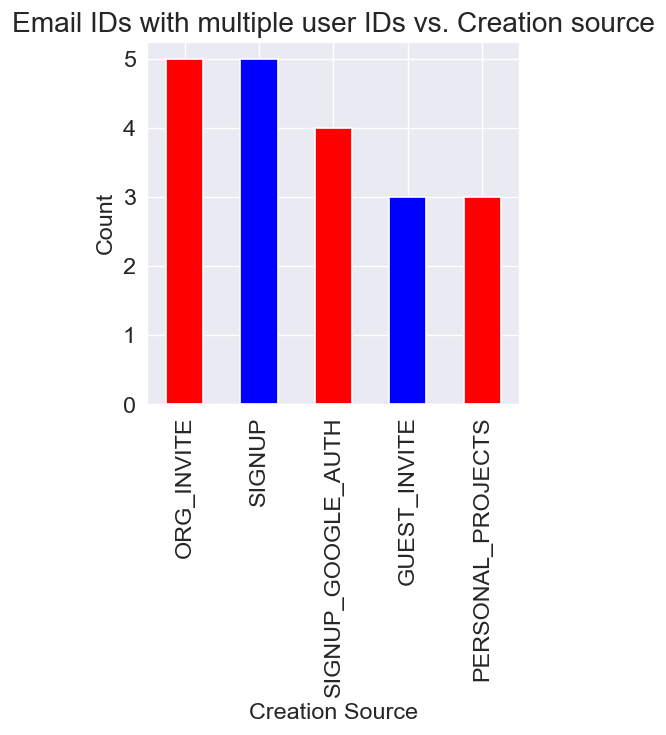

In [33]:
fig= plt.figure(figsize=(4,4))
multiple_userID_emails.creation_source.value_counts().plot(kind='bar', color=['r','b'])
plt.title("Email IDs with multiple user IDs vs. Creation source")
plt.xlabel('Creation Source')
plt.ylabel('Count');

## Classification Models

-------

Objective:
To find out important features by using Random Forest and Decision Tree classification models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Encoding the values

In [2]:
df = pd.read_csv("takehome_users_cleaned_dataset.csv")
df.head()

,Unnamed: 0,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,time,user_type
0,0,1,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4,3.53,0
1,1,2,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11,3.45,0
2,2,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3,23.14,0
3,3,4,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5,8.09,0
4,4,5,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1,10.14,0


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,time,user_type
0,1,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4,3.53,0
1,2,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11,3.45,0
2,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3,23.14,0
3,4,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5,8.09,0
4,5,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1,10.14,0


In [4]:
df.isnull().sum()

object_id                     0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
year                          0
month                         0
time                          0
user_type                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  float64
 9   year                        12000 non-null  int64  
 10  month                       12000 non-null  int64  
 11  time                        12000 non-null  float64
 12  user_type                   12000 non-null  int64  
dtypes: float64(3), int64(7), object

In [6]:
# one hot encoding of creation source column

encoded_df = pd.get_dummies(df, columns=['creation_source'])

encoded_df


,object_id,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month,time,user_type,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,Clausen August,augustcclausen@yahoo.com,1.398139e+09,1,0,11,10803.0,2014,4,3.53,0,1,0,0,0,0
1,2,Poole Matthew,matthewpoole@gustr.com,1.396238e+09,0,0,1,316.0,2013,11,3.45,0,0,1,0,0,0
2,3,Bottrill Mitchell,mitchellbottrill@gustr.com,1.363735e+09,0,0,94,1525.0,2013,3,23.14,0,0,1,0,0,0
3,4,Clausen Nicklas,nicklassclausen@yahoo.com,1.369210e+09,0,0,1,5151.0,2013,5,8.09,0,1,0,0,0,0
4,5,Raw Grace,graceraw@yahoo.com,1.358850e+09,0,0,193,5240.0,2013,1,10.14,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,Meier Sophia,sophiameier@gustr.com,1.378448e+09,0,0,89,8263.0,2013,9,6.14,0,0,1,0,0,0
11996,11997,Fisher Amelie,ameliefisher@gmail.com,1.358275e+09,0,0,200,0.0,2013,1,18.28,0,0,0,0,0,1
11997,11998,Haynes Jake,jakehaynes@cuvox.de,1.398603e+09,1,1,83,8074.0,2014,4,12.45,0,1,0,0,0,0
11998,11999,Faber Annett,mhaerzxp@iuxiw.com,1.338638e+09,0,0,6,0.0,2012,5,11.55,0,0,0,1,0,0


In [7]:
# find feature and target
X = encoded_df.drop(columns=['object_id','name','email','user_type'])
y = df.user_type.values

In [8]:
# Split the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=58, test_size=0.2)

X_train.shape, X_test.shape


((9600, 13), (2400, 13))

In [9]:
# Scale the train test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Decision Tree Classification

In [19]:
# DT
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# prediction
y_pred = dt.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [25]:
# Model score
dt.score(X_test, y_test).round(2)

0.96

In [26]:
# Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay

print('Test set accuracy:  {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("AUROC score:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

Test set accuracy:  0.96
AUROC score:  0.92


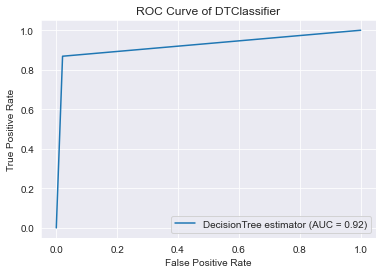

In [27]:
# ROC plot
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name='DecisionTree estimator').plot()
plt.title('ROC Curve of DTClassifier');

##### Reduce Overfitting

In [28]:
from sklearn.model_selection import cross_val_score

depth = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60] 

for i in depth:
    # initiate the model
    dt = DecisionTreeClassifier(max_depth=i)

    # fit the model
    dt.fit(X_train, y_train)

    trainacc = accuracy_score(y_train, dt.predict(X_train))

    dt = DecisionTreeClassifier(max_depth=i)
    validationacc = cross_val_score(dt, X, y, cv = 10)
    print("Depth = {}: train accuracy: {:.8f}, validation accuracy: {:.8f}".format(i, trainacc, np.mean(validationacc)))


Depth = 1: train accuracy: 0.93208333, validation accuracy: 0.92925000
Depth = 2: train accuracy: 0.95833333, validation accuracy: 0.95750000
Depth = 3: train accuracy: 0.96916667, validation accuracy: 0.96716667
Depth = 4: train accuracy: 0.97395833, validation accuracy: 0.96766667
Depth = 5: train accuracy: 0.97604167, validation accuracy: 0.97150000
Depth = 6: train accuracy: 0.98052083, validation accuracy: 0.97241667
Depth = 7: train accuracy: 0.98229167, validation accuracy: 0.97266667
Depth = 8: train accuracy: 0.98604167, validation accuracy: 0.97308333
Depth = 9: train accuracy: 0.98927083, validation accuracy: 0.97250000
Depth = 10: train accuracy: 0.99208333, validation accuracy: 0.97125000
Depth = 20: train accuracy: 1.00000000, validation accuracy: 0.96958333
Depth = 30: train accuracy: 1.00000000, validation accuracy: 0.96858333
Depth = 40: train accuracy: 1.00000000, validation accuracy: 0.96966667
Depth = 50: train accuracy: 1.00000000, validation accuracy: 0.96891667
D

In [29]:
# again training the model with depth 8

dt = DecisionTreeClassifier(max_depth=8)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8)

In [30]:
# score
dt.score(X_test, y_test)

0.9633333333333334

In [31]:
# prediction
y_pred = dt.predict(X_test)

print('Test set accuracy:  {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("AUROC score:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

Test set accuracy:  0.96
AUROC score:  0.91


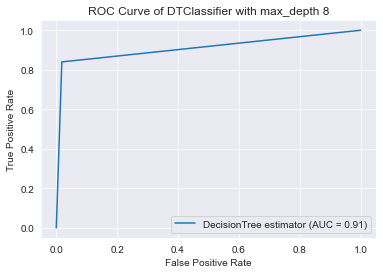

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name='DecisionTree estimator').plot()
plt.title('ROC Curve of DTClassifier with max_depth 8');

In [22]:
# feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})

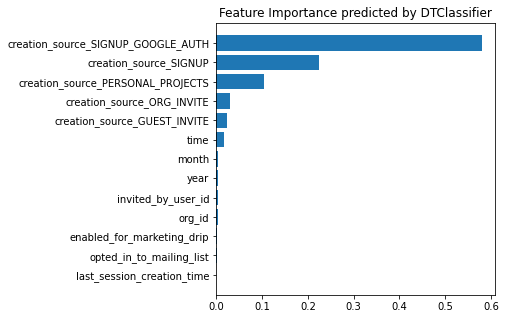

In [26]:
fig = plt.figure(figsize=(5,5))
plt.barh(feature_importance.feature, sorted(feature_importance.importance))
plt.title('Feature Importance predicted by DTClassifier')
plt.show()

#### Random Forest Classifier Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Score
rf.score(X_test, y_test)

0.9658333333333333

In [12]:
# prediction
y_pred = rf.predict(X_test)

In [13]:
# f1 score, ROC AUC score, 
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))
print('Test set accuracy:  {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("AUROC score:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

F1 Score: 0.86
Test set accuracy:  0.97
AUROC score:  0.89


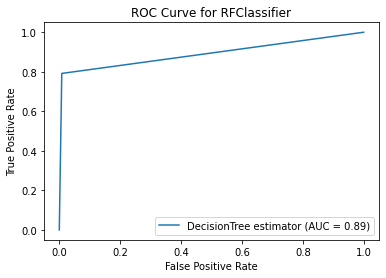

In [15]:
# ROC curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name='DecisionTree estimator').plot()
plt.title('ROC Curve for RFClassifier');

In [33]:
# feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

rf_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,last_session_creation_time,0.672409
6,month,0.087160
5,year,0.075409
7,time,0.054284
3,org_id,0.052684
4,invited_by_user_id,0.034578
1,opted_in_to_mailing_list,0.004863
2,enabled_for_marketing_drip,0.004419
8,creation_source_GUEST_INVITE,0.003282
10,creation_source_PERSONAL_PROJECTS,0.003028


# Conclusion

----

Based on the features present in dataset, some points have been observed by performing EDA and applying ML models.

1. New user registration is increasing in a month over month growth rate of 8.85%. This can be evidently observed in the ML models too, as last creation time has a higher feature importance score.
2. Number of adopted users is decreasing with time, as well as users' willingness to join mailing list and marketing drip is decreasing.
3. Registration through organizations is high hence, organizations can serve as a primary consumer acquisition and advertisement place.
4. Users' personal level invitation is not effective as highest referrals is 13 only.
5. Users are normally active throughout the day, however, evening(6-9pm) and early morning(3-6pm) shows seemingly higher traffic.
